In [1]:
import json
import pandas as pd
from pymongo import MongoClient
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]


def read_mongo(db, collection, query={}, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return db, df

In [3]:
DATADUMP = False

In [4]:
if DATADUMP:
    datasets_col_dic = {
        'LSD segmentation': 'false_calyx_kc_ids_full_lsd_local_filtered2_1',
        'FFN segmentation': 'false_calyx_kc_ids_full_ffn_filtered2_1_synfulv01',
    }

    datasets_df_dic = {}
    db_col = 'summary'

    with open('../dbconfigsynful.json') as f:
        db_host = json.load(f)['db_host']

    for key, db_name in datasets_col_dic.items():
        print('Loading data for', key)
        db, df = read_mongo(db_name, db_col, host=db_host, no_id=True)
        df = df[df.dist_thr == 250]
        df.drop_duplicates(inplace=True)
        datasets_df_dic[key] = df
        print('total items in dataframe: {}'.format(len(df)))
        output = f'{key[:3]}_dump.csv'
        df.to_csv(output, index=False)


In [5]:
datasets_df_dic = {}
datasets_df_dic['LSD segmentation'] = pd.read_csv('LSD_dump.csv')
datasets_df_dic['FFN segmentation'] = pd.read_csv('FFN_dump.csv')

best fscore: 0.7282, precision: 0.7748, recall: 0.6868 with score threshold: 60
best fscore: 0.6864, precision: 0.7262, recall: 0.6507 with score threshold: 30


/groups/funke/home/buhmannj/anaconda2/envs/newdaisy/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


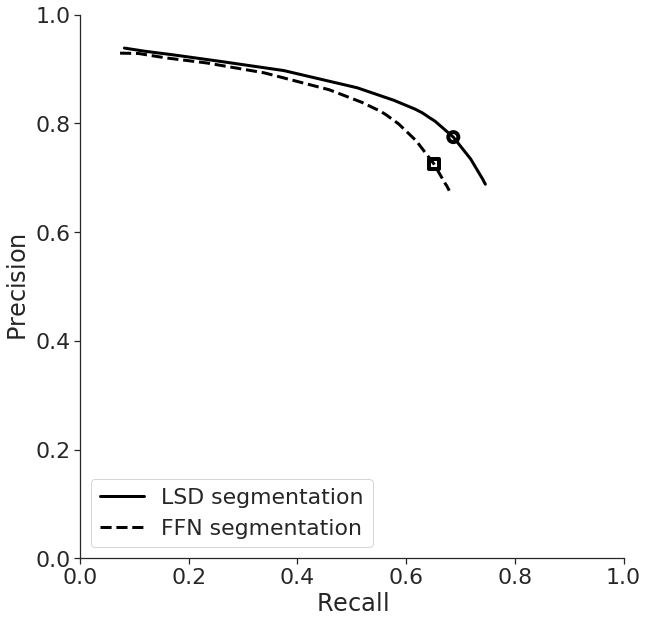

In [6]:
sns.set(font_scale=2.0)
sns.set_style("ticks")
plt.rcParams['svg.fonttype'] = 'none'
current_palette = sns.color_palette("colorblind")
sns.set_palette(current_palette)


plt.figure(figsize=(10, 10))


ebcolor = '#81c4d5'
pbcolor = '#7bad85'
calyxcolor = '#152099'
calyxcolor = 'black'
lhcolor = '#d98686'
colors = [calyxcolor,calyxcolor, lhcolor, pbcolor, ebcolor]
colors.extend(colors)

markers = ['o', 's', 'D', '^', '*']
markers.extend(markers)
ii = 0
for key, df in datasets_df_dic.items():
    df = df.sort_values(by='score_thr', ascending=False)
    best_row = df.loc[df['fscore'].idxmax()]
    fscore = best_row['fscore']
    precision = best_row['precision']
    recall = best_row['recall']
    score_thr = best_row['score_thr']

    

    if key.endswith('heinrichscore') or 'FFN' in key:
        plt.plot(df['recall'], df['precision'],  '--', label=key, color=colors[ii], linewidth=3.)
    else:
        plt.plot(df['recall'], df['precision'], label=key, color=colors[ii], linewidth=3.)
    print(f"best fscore: {fscore:0.4}, precision: {precision:0.4}, recall: {recall:0.4} with score threshold: {score_thr}")
    plt.scatter(best_row['recall'], best_row['precision'], marker=markers[ii],  facecolors='none', edgecolors=colors[ii], s=100, linewidth=4, label=None)
    ii += 1
    df.to_csv(f'{key[:3]}_curve.csv', index=False, columns=['fscore', 'precision', 'recall', 'score_thr'])

plt.xlabel(r'$\mathrm{Recall}$')
plt.ylabel(r'$\mathrm{Precision}$')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
sns.despine()
plt.axes().set_aspect(1.0)
plt.legend()
outputfile = 'figures/ffn_lsd/calyx.svg'
plt.savefig(outputfile)

best fscore: 0.7282, precision: 0.7748, recall: 0.6868 with score threshold: 60
best fscore: 0.6864, precision: 0.7262, recall: 0.6507 with score threshold: 30


/groups/funke/home/buhmannj/anaconda2/envs/newdaisy/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


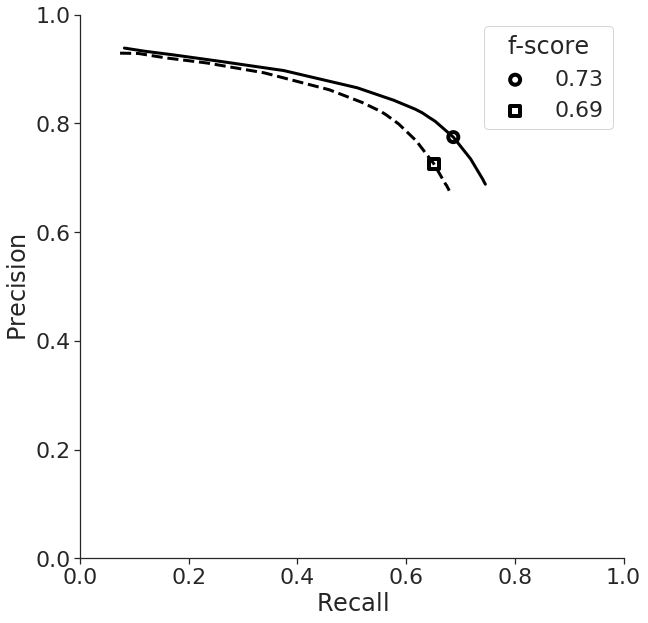

In [7]:
sns.set(font_scale=2.0)
sns.set_style("ticks")
plt.rcParams['svg.fonttype'] = 'none'
current_palette = sns.color_palette("colorblind")
sns.set_palette(current_palette)


plt.figure(figsize=(10, 10))


ebcolor = '#81c4d5'
pbcolor = '#7bad85'
calyxcolor = '#152099'
calyxcolor = 'black'
lhcolor = '#d98686'
colors = [calyxcolor,calyxcolor, lhcolor, pbcolor, ebcolor]
colors.extend(colors)

markers = ['o', 's', 'D', '^', '*']
markers.extend(markers)
ii = 0
for key, df in datasets_df_dic.items():
    df = df.sort_values(by='score_thr', ascending=False)
    best_row = df.loc[df['fscore'].idxmax()]
    fscore = best_row['fscore']
    precision = best_row['precision']
    recall = best_row['recall']
    score_thr = best_row['score_thr']

    

    if key.endswith('heinrichscore') or 'FFN' in key:
        plt.plot(df['recall'], df['precision'],  '--', label=None, color=colors[ii], linewidth=3.)
    else:
        plt.plot(df['recall'], df['precision'], label=None, color=colors[ii], linewidth=3.)
    print(f"best fscore: {fscore:0.4}, precision: {precision:0.4}, recall: {recall:0.4} with score threshold: {score_thr}")
    plt.scatter(best_row['recall'], best_row['precision'], marker=markers[ii],  facecolors='none', edgecolors=colors[ii], s=100, linewidth=4, label=f'{fscore:0.2}')
    ii += 1

plt.xlabel(r'$\mathrm{Recall}$')
plt.ylabel(r'$\mathrm{Precision}$')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
sns.despine()
plt.axes().set_aspect(1.0)
plt.legend(title='f-score')
outputfile = 'figures/ffn_lsd/calyx_legend01.svg'
plt.savefig(outputfile)